<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllable Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [1]:
# the following line enable interact with figures, 
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.utils import *

Define directories path and show audio files

In [3]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
audios_path = "C:\\Users\\sebas\\Documents\\GitHub\\audios\\Dissertation-xeno\\"#rufous-collared-sparrow\\humbolt\\"

paths  = bs.Paths()#audios_path=audios_path)              # root_path, audios_path, bird_name
ploter = bs.Ploter(save=True)   # to save figures save=True 
#paths.data
paths.ShowFiles()

The folder has 7 songs:
0-FNJV_0007703_Physalaemus_cuvieri_Sao Roque de Minas_MG_Adao Jose Cardoso.wav
1-FNJV_0031193_Physalaemus_cuvieri_Cabreuva_SP_Gilda V. Andrade.wav
2-FNJV_0031194_Physalaemus_cuvieri_Pocos de Caldas_MG_Avelino Barrio.wav
3-humman.wav
4-XC104508 - Ocellated Tapaculo - Acropternis orthonyx.wav
5-XC11293 - Rufous-collared Sparrow - Zonotrichia capensis.wav
6-XC513182 - Rufous-collared Sparrow - Zonotrichia capensis.wav


Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

The son has 1 syllables


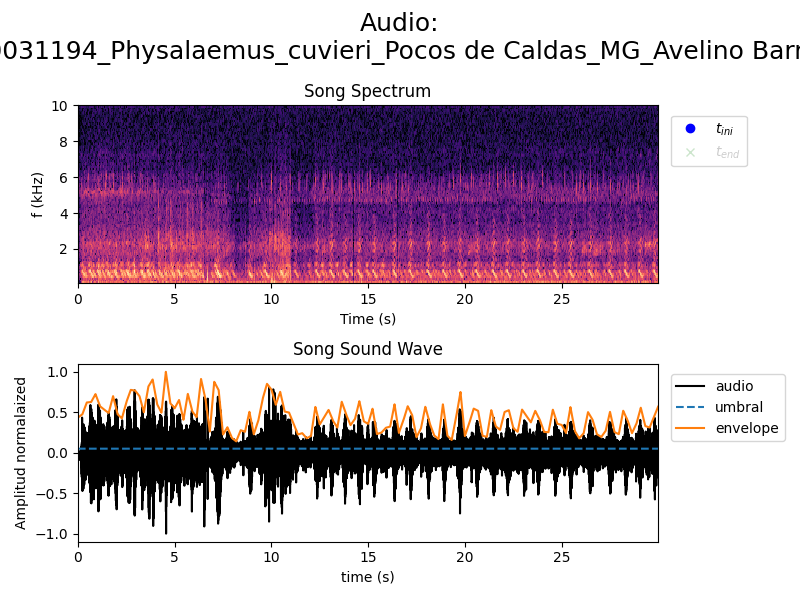

In [25]:
birdsong = bs.BirdSong(paths, no_file=2, NN=256, flim=(100,10e3),  tlim=(0.,30),
                       Nt=5000, umbral=0.05, split_method="amplitud")
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

Select time inverval of interest

In [26]:
time_interval = Positions(ploter.klicker)[0]
# time_interval = np.array([0.77902637, 1.089736  ])
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 8.8061 s, final time 9.0500 s


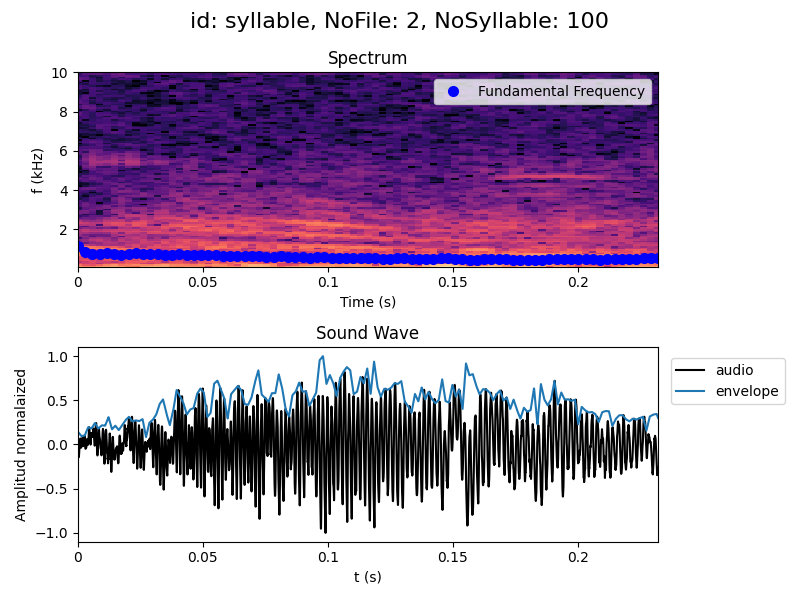

In [28]:
syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1.05, NN=birdsong.NN, Nt=30, ide="syllable", flim=birdsong.flim)
syllable.no_syllable = 100
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

Define syllable by the previous time interval selected

In [29]:
# %%time
# syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1.45, Nt=30, NN=birdsong.NN)
# ploter.Plot(syllable, SelectTime_on=True, FF_on=True)
# AudioPlay(syllable)

3D plot (in process)

In [30]:
# ploter.Plot3d(birdsong)

In [31]:
# ploter.Plot(birdsong, FF_on=False, syllable=syllable)

Define syllable with the default syllable extractor

In [32]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [33]:
# ploter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [29]:
brute     = {'method':'brute', 'Ns':11}  # , "workers":-1
optimizer = bs.Optimizer(syllable, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [40]:
optimal_gamma = optimizer.OptimalGamma(syllable)
# optimal_gamma = 37000 # optimizer.AllGammas(birdsong)

C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try incre

γ* =  37000, t=1.5037 min


C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


In [31]:
syllable.p["gm"].set(value=optimal_gamma)
syllable.p

Parameters([('a0', <Parameter 'a0', value=0.11 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.05 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>)])

Optimal $\alpha$ and $\beta$

In [ ]:
optimizer.OptimalParams(syllable, Ns=11)

Display optimal parameters and generate a synthetic syllable 

In [33]:
syllable.p

Parameters([('a0', <Parameter 'a0', value=0.226 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.40000000000000036 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.10000000000000009 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=0.6000000000000001 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>)])

In [34]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

Parameters([('a0', <Parameter 'a0', value=0.226 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.40000000000000036 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.10000000000000009 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=0.6000000000000001 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>)])

C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


Visualize and plot the synthetic syllable

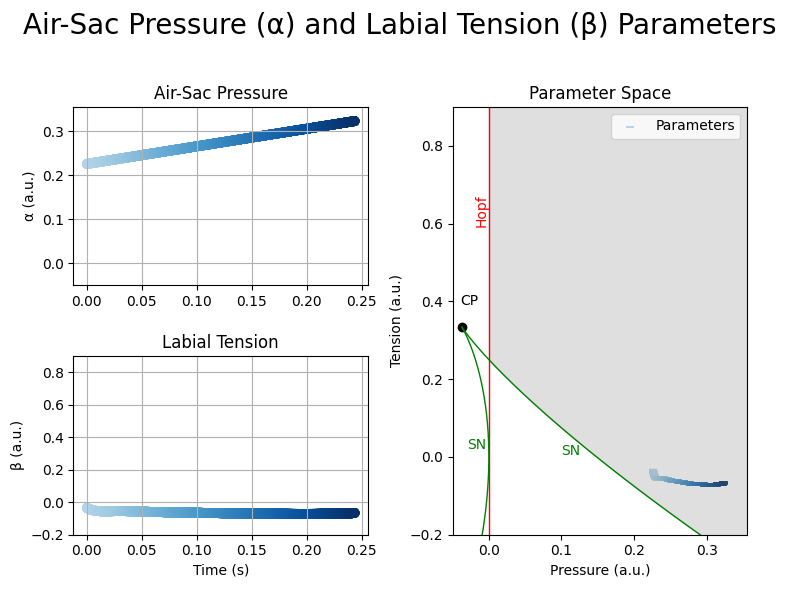

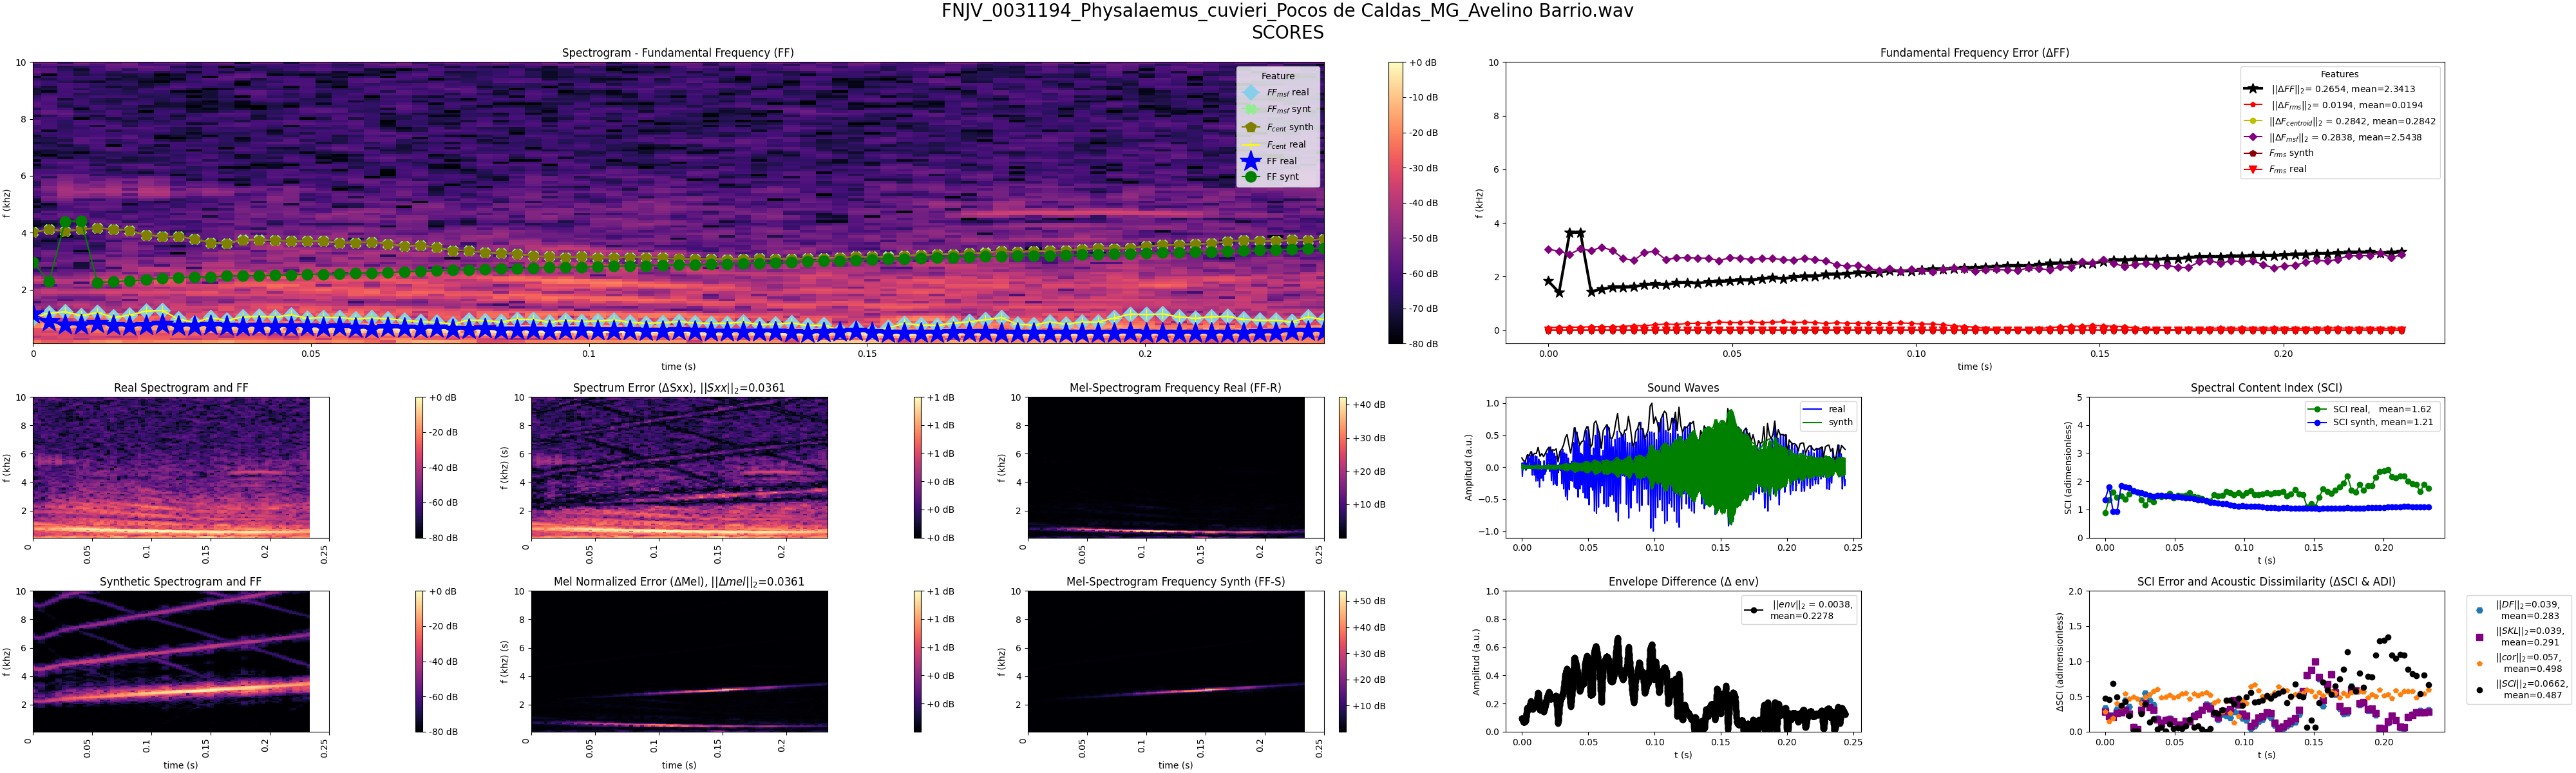

In [39]:
synth_syllable.paths = paths
# syllable.id = "syllable"
# synth_syllable.id = "synth-syllable"
# ploter.PlotVs(synth_syllable)
ploter.PlotAlphaBeta(synth_syllable)
ploter.Result(syllable, synth_syllable)
# ploter.Syllables(syllable, synth_syllable)
AudioPlay(synth_syllable)

In [36]:
AudioPlay(syllable)

Write synthetic and real syllables

In [78]:
# syllable.WriteAudio()
synth_syllable.WriteAudio()

twice model solution